In [1]:
from github import Github
import pandas as pd 
import json
import itertools
import os
import requests
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx




##### Enter personal token here to authenticate.

In [ ]:
%store -r access_token
g = Github(access_token)

#### These variables are global variables.

In [5]:
repo_var = None
page_num=None
repo_list=list()
list_without_lesson=list()
list_with_lesson=list()
final_repo_list=list()

#### Declaring a function

* To get the total repositories count
* Creating a page_num variable to hold the valid page numbers to iterate the repo list.
* Final repo list created from repo list
* List with lesson created from final repo list
* List without lesson created from final repo list

In [6]:
def repo_initialize():
    
    '''
    Function takes no paramter.
    Returning total repositories count, final repository list, list_with_lesson & list_without_lesson.
    
    '''
    
    
    global repo_var
    global page_num
    global repo_list
    global list_without_lesson
    global list_with_lesson
    global final_repo_list
    
    repo_var = g.get_organization("carpentries-incubator").get_repos()

    page_num = 0
    for i in range(0,10):
        if len(repo_var.get_page(i))==0:
            page_num = i
            break
        else:
            pass
    repo_list = list()
    for i in range(0,page_num):
        repo_list.append(repo_var.get_page(i))
    final_repo_list = list((itertools.chain.from_iterable(repo_list)))

# This program gives two Repository lists. 1)list_with_lesson & list_without_lesson.

    for repo in final_repo_list:
        tags=repo.get_topics()
        if "lesson" in tags:
            list_with_lesson.append(repo)
        else:
            list_without_lesson.append(repo)
            
repo_initialize()

##### Readinng all the datasets to get the unique list of contributors( commit,PR and issue) of each repositories .

In [7]:
def read_all_the_files(list_with_lesson):
    
    """
    This function reads all the json files pertaining to each repsoitory.
    It iterates over each repository of list that contains repsoitories of lesson.
    
    Input:- list of repositories of lesson -list_with_lesson.
    
    Output:- It returns a dictionary that contains repository name as a key & list of contributor as a value.
    
    """
    
    
    contributors_count=dict()
    for repo in list_with_lesson:
        contributors=set()
        if not os.path.exists(repo.name+'.json'): 
            #print(repo.name , "not found")
            continue
        with open(repo.name+'.json','r') as f:
            try:
                fildata=json.load(f)
                #print(fildata)
                
                commit_dict=fildata['commits_dict']
                #print(commit_dict)
                for k in commit_dict.keys():
                    try:
                        contributors.add(commit_dict[k][0])
                        #print(commit_dict[k])
                    except:
                        pass
                for pr in fildata['pr_dict']:
                    try:
                        contributors.add(pr['pr_name'])
                    except:
                        pass
                for issue in fildata['issue_dict']:
                    try:
                        contributors.add(issue['user_name'])
                    except:
                        pass
            except:
                pass
        contributors_count[repo.name]=contributors         
                


        
            
    return contributors_count
contri_data=read_all_the_files(list_with_lesson)     

#### Function to get the list of repositories of each contributors

In [8]:
def get_list_of_repo_for_each_contributors(contri_data):
    
    """
    This function gives the list of repositories of each contributors.
    Input:- It takes a dictionary as an argument that contains repository name as a key & list of contributor as a value.
    Output:- It returns a dictionary that contains contributor as a key and repsoitories as a value.
    

    """
    
    
    cdict=dict()
    for k_repo in contri_data.keys():
        #print(contri_data[k_repo])
        if contri_data[k_repo] is None:
            continue
        for contributor in contri_data[k_repo]:# clist is containing the all the contributors of K_repo.
        
            cdict[contributor]=set() # containing all contributors as a key and their corresponding list of repos to which they have contributed  in which they are ocntributing.
        
        for contributor in cdict.keys():
            for repo in contri_data.keys():
                if contributor in contri_data[repo]:
                    cdict[contributor].add(repo)
    return cdict

all_contributors_list=get_list_of_repo_for_each_contributors(contri_data)

        

#### Function count repositories of each contributor to which the user has contributed to.

In [9]:
def count_repo_of_each_contributor(all_contributors_list):

    """
    This functions count repositories of each contributor to which the user has contributed to.
    Input:- It takes a dictionary that contains contributor as a key and repsoitories as a value.
    Output:- It returns a dataframe of with two columns , 1st column has contributors name and 2nd column has the total count 
             repositories to which that contributor has contributed to.
    
    """
    
    
    contrilist=[]
    repocountlist=[]
    histo_df=pd.DataFrame()
    for k_repo in all_contributors_list.keys():
        contrilist.append(k_repo)
        repocountlist.append(len(all_contributors_list[k_repo]))
        
    return contrilist,repocountlist

contrilist,repocountlist=count_repo_of_each_contributor(all_contributors_list)

histo_df=pd.DataFrame()

histo_df['Contributor']=contrilist
histo_df['Repo_Count']=repocountlist


In [22]:
pd.set_option('display.max_rows', None)
histo_df


,Contributor,Repo_Count
0,RÃ©mi Emonet,55
1,John Blischak,8
2,Jon Pipitone,55
3,Piotr Banaszkiewicz,55
4,Michael Hansen,55
5,Andy Boughton,51
6,Erin Becker,54
7,Brian Ballsun-Stanton,1
8,Greg Wilson,55
9,James Allen,55


In [10]:
df8=histo_df

In [20]:
histo_df[histo_df['Repo_Count']==2].shape

(109, 2)

#### Function to plot the histogram.

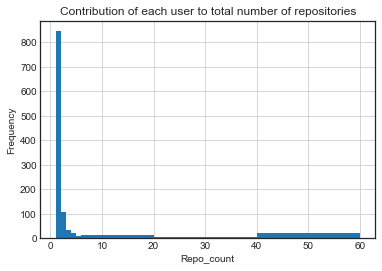

<Figure size 432x288 with 0 Axes>

In [21]:
def plot_histogram(histo_df):
    plt.style.use('seaborn-white')
    histo_df.hist(column='Repo_Count',bins=[1,2,3,4,5,6,10,20,30,40,50,60])
    plt.xlabel("Repo_count")
    plt.ylabel("Frequency")
    plt.title("Contribution of each user to total number of repositories")
    plt.show()
    plt.tight_layout()
plot_histogram(histo_df)



In [13]:
import networkx as nx

In [14]:
graph=nx.DiGraph()

#### Program to plot the collaboration graph to understand collaboration between contributor-contributor.

In [15]:

edges=[] #list contains typles , each tuple has contributor-contributor mapping
for contributor in all_contributors_list.keys():
    for repo in all_contributors_list[contributor]:
        for contributor2 in all_contributors_list.keys():
            if contributor != contributor2:
                if repo in all_contributors_list[contributor2]:
                    if (repo is not None) and (contributor is not None) and (contributor2 is not None):
                        edges.append((contributor,contributor2))
                    

In [16]:
for i in range(len(edges)):
    edges[i]=(edges[i][0][0],edges[i][1][0])
    

In [17]:
graph.add_edges_from(edges)


In [18]:
pos=nx.spring_layout(graph)


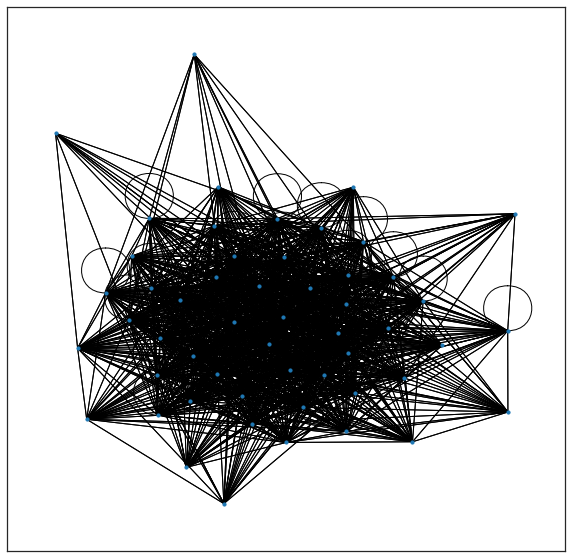

In [19]:
figsize=plt.figure(figsize=[10,10])
nx.draw_networkx_nodes(graph,pos,cmap=plt.get_cmap('jet'),node_size=10)
nx.draw_networkx_edges(graph,pos,edgelist=graph.edges(),arrows=False)

